<a href="https://colab.research.google.com/github/Mgll3/Modelos2/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de la probabilidad de ocurrencia de ataque cardiaco

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_validate
import matplotlib.pyplot as plt
import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv")
#Link para descargar base de datos https://drive.google.com/file/d/1f8-dAesLaDCHXqKBqb_zQgolTcCYosuN/view?usp=sharing
df_copy = df.copy()

In [ ]:
df_copy.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Preparación y entrenamiento:

In [ ]:
y = df_copy["output"]
X = df_copy.drop("output", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=None)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = XGBClassifier(random_state=17, eval_metric='logloss')
model.fit(X_train, y_train)           #Entrenamiento del modelo


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=17, ...)

Rendimiento del Modelo con Validación Cruzada:

In [ ]:
cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=['accuracy', 'f1', 'roc_auc', 'precision', 'recall'])
print('Validacion Cruzada: Entrenamiento')
print(f'Accuracy: {round(cv_results["test_accuracy"].mean(), 4)}')
print(f'Auc: {round(cv_results["test_roc_auc"].mean(), 4)}')
print(f'Recall: {round(cv_results["test_recall"].mean(), 4)}')
print(f'Precision: {round(cv_results["test_precision"].mean(), 4)}')
print(f'F1: {round(cv_results["test_f1"].mean(), 4)}')


Validacion Cruzada: Entrenamiento
Accuracy: 0.8055
Auc: 0.8839
Recall: 0.8413
Precision: 0.8124
F1: 0.8253


Rendimiento del Modelo con datos nuevos:

In [ ]:
cv_results = cross_validate(model, X_test, y_test, cv=5, scoring=['accuracy', 'f1', 'roc_auc', 'precision', 'recall'])
print('Validacion Cruzada: Testeo')
print(f'Accuracy: {round(cv_results["test_accuracy"].mean(), 4)}')
print(f'Auc: {round(cv_results["test_roc_auc"].mean(), 4)}')
print(f'Recall: {round(cv_results["test_recall"].mean(), 4)}')
print(f'Precision: {round(cv_results["test_precision"].mean(), 4)}')
print(f'F1: {round(cv_results["test_f1"].mean(), 4)}')


Validacion Cruzada: Testeo
Accuracy: 0.8205
Auc: 0.93
Recall: 0.8429
Precision: 0.8183
F1: 0.8241


Grid Search:

In [ ]:
parameters = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [ 110, 120, 130],
    'max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=17, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [110, 120, 130]},
             scoring='accuracy')

In [ ]:
cv_results = grid_search.cv_results_
for mean_score, std, params in zip(cv_results["mean_test_score"], cv_results["std_test_score"], cv_results["params"]):
    print(f"Precisión: {mean_score:.4f}, Desviación: {std:.4f} para los parámetros {params}" )

Precisión: 0.8098, Desviación: 0.0364 para los parámetros {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 110}
Precisión: 0.8181, Desviación: 0.0280 para los parámetros {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 120}
Precisión: 0.8057, Desviación: 0.0288 para los parámetros {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 130}
Precisión: 0.8140, Desviación: 0.0133 para los parámetros {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 110}
Precisión: 0.8099, Desviación: 0.0150 para los parámetros {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 120}
Precisión: 0.8099, Desviación: 0.0150 para los parámetros {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 130}
Precisión: 0.8141, Desviación: 0.0178 para los parámetros {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 110}
Precisión: 0.8141, Desviación: 0.0178 para los parámetros {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 120}
Precisión: 0.8141, Desviación: 0.0178 para los parámetro

In [ ]:
results = grid_search.cv_results_
print(grid_search.best_params_)
#Resultado gridSearch:
#Precisión: 0.8181, Desviación: 0.0280 para los parámetros {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 120}
#Tanto GridSearch como yo elegimos el mismo modelo puesto que tiene una muy buena precisión y además es de los modelos más simples
#Y con menos requerimiento de procesamiento, el unico problema es su Desviación que aunque no es una desviación muy alta en terminos generales
#Hay otro modelo parecido con mucha menor Desviación:
#Precisión: 0.8140, Desviación: 0.0133 para los parámetros {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 110}
#Pero contando con que nuestra cantidad de datos es baja prefiero el modelo con un poco más de desviación y una menor profundidad de cada arbol
#Para que así pueda predecir mejor cualquier nuevo dato.


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 120}


Entrenamiento de Modelo con HiperParametros elegidos:





In [ ]:
model_final = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=120, random_state=17, eval_metric='logloss')
model_final.fit(X_train, y_train)
y_pred_final = model_final.predict(X_test)




Rendimiento del nuevo Modelo:

In [ ]:
cv_results = cross_validate(model_final, X_test, y_test, cv=5, scoring=['accuracy', 'f1', 'roc_auc', 'precision', 'recall'])
print('Validacion Cruzada: Testeo')
print(f'Accuracy: {round(cv_results["test_accuracy"].mean(), 4)}')
print(f'Auc: {round(cv_results["test_roc_auc"].mean(), 4)}')
print(f'Recall: {round(cv_results["test_recall"].mean(), 4)}')
print(f'Precision: {round(cv_results["test_precision"].mean(), 4)}')
print(f'F1: {round(cv_results["test_f1"].mean(), 4)}')
#Se puede notar que hubo una mejora en todos menos en Auc

Validacion Cruzada: Testeo
Accuracy: 0.8538
Auc: 0.929
Recall: 0.8762
Precision: 0.8445
F1: 0.8552


Visualización de las Caracteristicas más importantes:

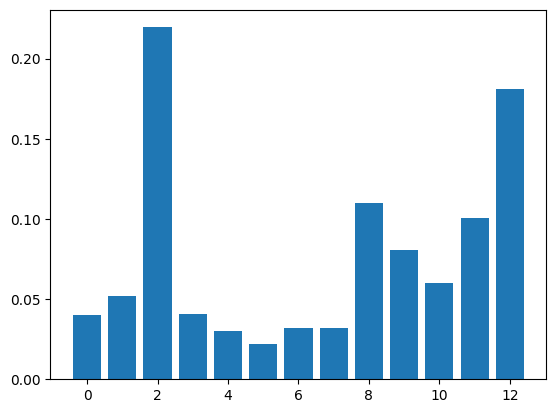

In [ ]:
feature_importances = model_final.feature_importances_
plt.bar(range(len(model_final.feature_importances_)), model_final.feature_importances_)
plt.show()

In [ ]:
#Guardamos el Modelo Creado:
joblib.dump(model_final, 'modelo_entrenadoXGBoost.pkl')

['modelo_entrenadoXGBoost.pkl']